## Seasons

## KNN

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal_Data\12km_Season_Wind\*.nc", parallel=True)

In [4]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [5]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [6]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [7]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

In [8]:
# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')

# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df = df[~nan_mask]

df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

In [10]:
X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(accuracy)
print(classification_report(y_test, y_pred))

# Training set score
train_score = knn.score(X_train, y_train)
print(f"Training Set Score: {train_score:.4f}")

# Test set score
test_score = knn.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Average Accuracy: {:.4f}".format(scores.mean()))
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

1.0
              precision    recall  f1-score   support

   post_1990       1.00      1.00      1.00     11262
    pre_1990       1.00      1.00      1.00      6813

    accuracy                           1.00     18075
   macro avg       1.00      1.00      1.00     18075
weighted avg       1.00      1.00      1.00     18075

Training Set Score: 1.0000
Test Set Score: 1.0000
Average Accuracy: 0.6348
95% Confidence Interval: (0.5307890855683012, 0.7388012627630017)


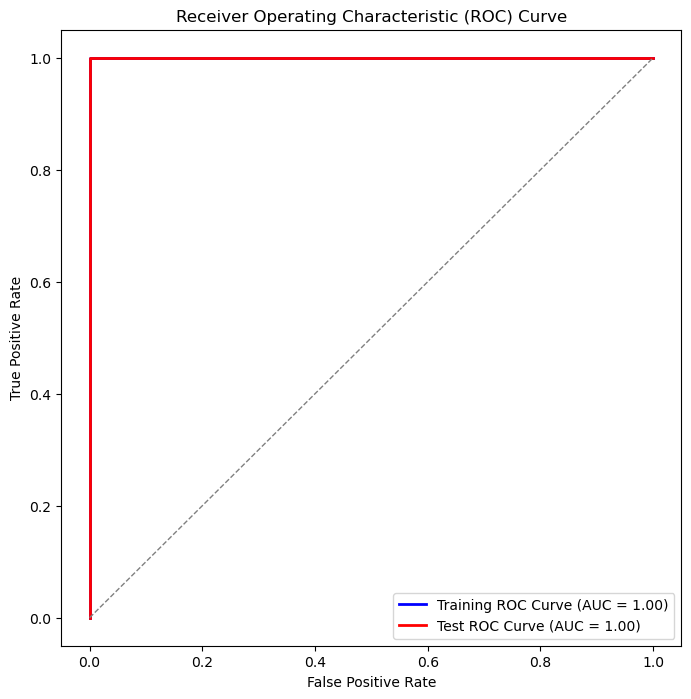

In [11]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = knn.predict_proba(X_train)[:, 1]
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

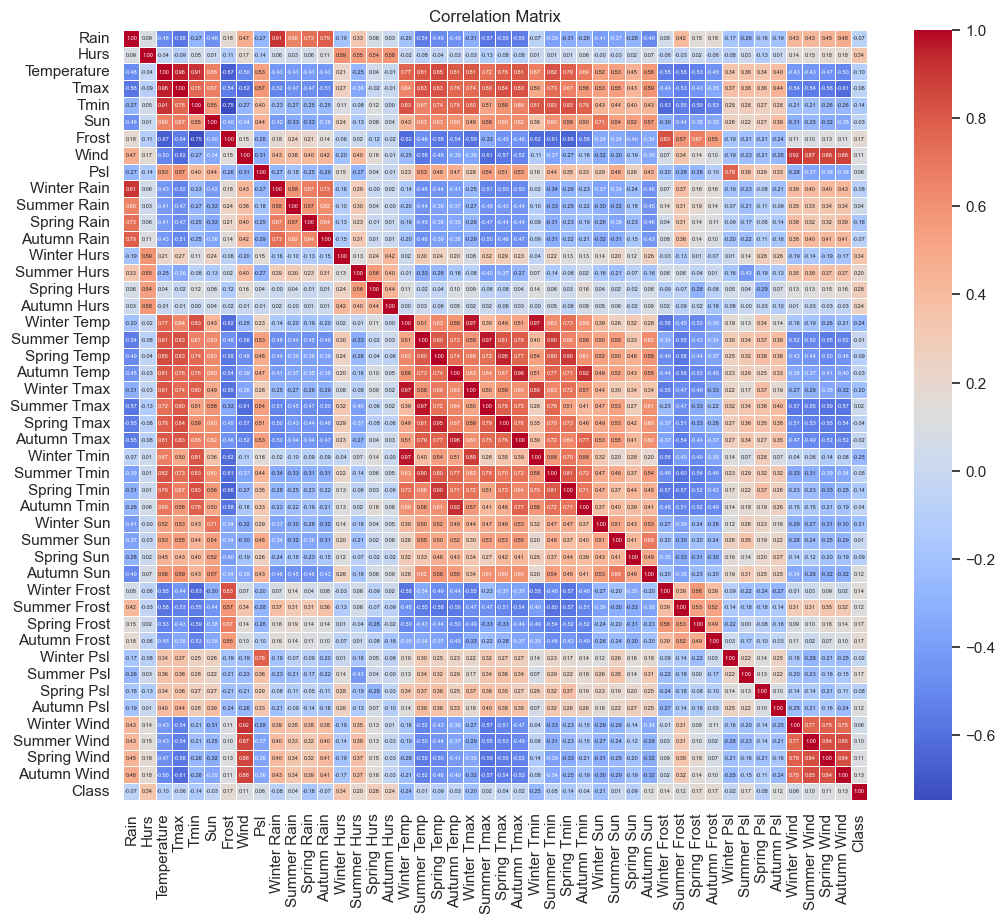

In [12]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

correlation_matrix = df.corr()
sns.set(style="white")

fontsize = 4

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={'size': fontsize})
plt.title("Correlation Matrix")
plt.show()

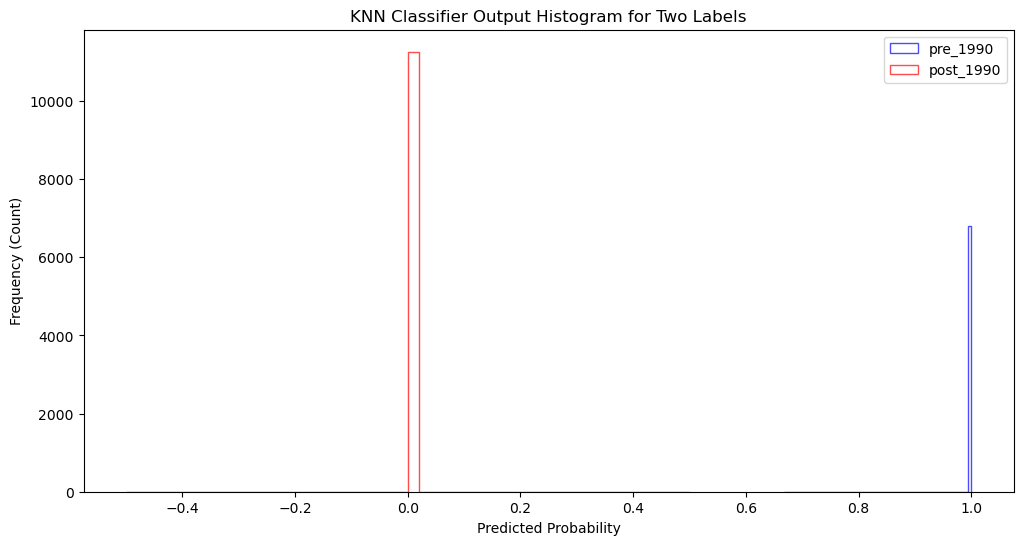

In [12]:
# Get the predicted probabilities for the positive class for the test set
y_test_prob = knn.predict_proba(X_test)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

# Specify the two labels for which you want to create histograms
label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')

plt.title('KNN Classifier Output Histogram for Two Labels')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

The mean values of the classes are 0.9998042957091834 0.0
The standard deviations of the classes are 0.008074432700572887 0.0


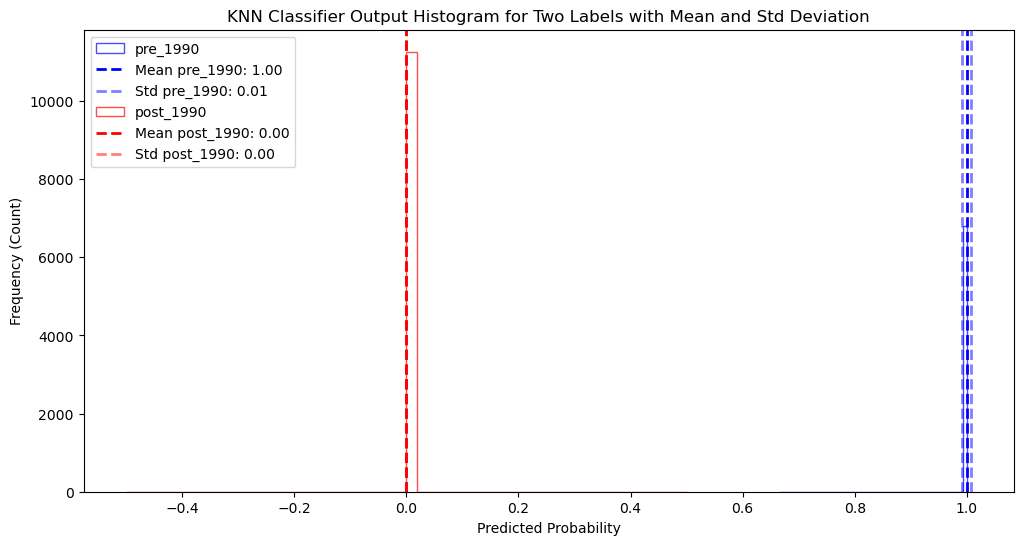

In [13]:
label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('KNN Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [14]:
e = 10**-10

z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2) + e)


print('The Z-score for the nominal KNN classifier with feature engineering is', z)

The Z-score for the nominal KNN classifier with feature engineering is 123.8233775700988


## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
from scipy.stats import t

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\Seasonal Data\12km_Season_Wind\*.nc", parallel=True)

In [ ]:
rain = np.array(data_rain['rainfall'])
winter_rain = rain[3::4]
summer_rain = rain[5::4]
spring_rain = rain[4::4]
autumn_rain = rain[6::4]
hurs = np.array(data_hurs['hurs'])
winter_hurs = hurs[3::4]
summer_hurs = hurs[5::4]
spring_hurs = hurs[4::4]
autumn_hurs = hurs[6::4]
temp = np.array(data_temp['tas'])
winter_temp = temp[3::4]
summer_temp = temp[5::4]
spring_temp = temp[4::4]
autumn_temp = temp[6::4]
temp_max = np.array(data_tmax['tasmax'])
winter_tmax = temp_max[3::4]
summer_tmax = temp_max[5::4]
spring_tmax = temp_max[4::4]
autumn_tmax = temp_max[6::4]
temp_min = np.array(data_tmin['tasmin'])
winter_tmin = temp_min[3::4]
summer_tmin = temp_min[5::4]
spring_tmin = temp_min[4::4]
autumn_tmin = temp_min[6::4]
sun = np.array(data_sun['sun'])
winter_sun = sun[3::4]
summer_sun = sun[5::4]
spring_sun = sun[4::4]
autumn_sun = sun[6::4]
frost = np.array(data_frost['groundfrost'])
winter_frost = frost[3::4]
summer_frost = frost[5::4]
spring_frost = frost[4::4]
autumn_frost = frost[6::4]
psl = np.array(data_psl['psl'])
winter_psl = psl[3::4]
summer_psl = psl[5::4]
spring_psl = psl[4::4]
autumn_psl = psl[6::4]
wind = np.array(data_wind['sfcWind'])
winter_wind = wind[3::4]
summer_wind = wind[5::4]
spring_wind = wind[4::4]
autumn_wind = wind[6::4]

In [ ]:
temp_reduced = block_reduce(temp, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp))
tmax_reduced = block_reduce(temp_max, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_max))
tmin_reduced = block_reduce(temp_min, block_size=(4, 1, 1), func=np.mean, cval=np.mean(temp_min))
rain_reduced = block_reduce(rain, block_size=(4, 1, 1), func=np.mean, cval=np.mean(rain))
hurs_reduced = block_reduce(hurs, block_size=(4, 1, 1), func=np.mean, cval=np.mean(hurs))
sun_reduced = block_reduce(sun, block_size=(4, 1, 1), func=np.mean, cval=np.mean(sun))
frost_reduced = block_reduce(frost, block_size=(4, 1, 1), func=np.mean, cval=np.mean(frost))
psl_reduced = block_reduce(psl, block_size=(4, 1, 1), func=np.mean, cval=np.mean(psl))
wind_reduced = block_reduce(wind, block_size=(4, 1, 1), func=np.mean, cval=np.mean(wind))

In [ ]:
min_length = len(autumn_wind)
rain_reduced = rain_reduced[:min_length]
hurs_reduced = hurs_reduced[:min_length]
temp_reduced = temp_reduced[:min_length]
tmax_reduced = tmax_reduced[:min_length]
tmin_reduced = tmin_reduced[:min_length]
sun_reduced = sun_reduced[:min_length]
frost_reduced = frost_reduced[:min_length]
wind_reduced = wind_reduced[:min_length]
psl_reduced = psl_reduced[:min_length]
winter_rain = winter_rain[:min_length]
summer_rain = summer_rain[:min_length]
spring_rain = spring_rain[:min_length]
autumn_rain = autumn_rain[:min_length]
winter_hurs = winter_hurs[:min_length]
summer_hurs = summer_hurs[:min_length]
spring_hurs = spring_hurs[:min_length]
autumn_hurs = autumn_hurs[:min_length]
winter_temp = winter_temp[:min_length]
summer_temp = summer_temp[:min_length]
spring_temp = spring_temp[:min_length]
autumn_temp = autumn_temp[:min_length]
winter_tmax = winter_tmax[:min_length]
summer_tmax = summer_tmax[:min_length]
spring_tmax = spring_tmax[:min_length]
autumn_tmax = autumn_tmax[:min_length]
winter_tmin = winter_tmin[:min_length]
summer_tmin = summer_tmin[:min_length]
spring_tmin = spring_tmin[:min_length]
autumn_tmin = autumn_tmin[:min_length]
winter_sun = winter_sun[:min_length]
summer_sun = summer_sun[:min_length]
spring_sun = spring_sun[:min_length]
autumn_sun = autumn_sun[:min_length]
winter_frost = winter_frost[:min_length]
summer_frost = summer_frost[:min_length]
spring_frost = spring_frost[:min_length]
autumn_frost = autumn_frost[:min_length]
winter_psl = winter_psl[:min_length]
summer_psl = summer_psl[:min_length]
spring_psl = spring_psl[:min_length]
autumn_psl = autumn_psl[:min_length]
winter_wind = winter_wind[:min_length]
summer_wind = summer_wind[:min_length]
spring_wind = spring_wind[:min_length]
autumn_wind = autumn_wind[:min_length]

In [ ]:
scaler = MinMaxScaler()

rain_reduced = scaler.fit_transform(rain_reduced.reshape(-1, 1)).flatten()
hurs_reduced = scaler.fit_transform(hurs_reduced.reshape(-1, 1)).flatten()
temp_reduced = scaler.fit_transform(temp_reduced.reshape(-1, 1)).flatten()
tmax_reduced = scaler.fit_transform(tmax_reduced.reshape(-1, 1)).flatten()
tmin_reduced = scaler.fit_transform(tmin_reduced.reshape(-1, 1)).flatten()
sun_reduced = scaler.fit_transform(sun_reduced.reshape(-1, 1)).flatten()
frost_reduced = scaler.fit_transform(frost_reduced.reshape(-1, 1)).flatten()
wind_reduced = scaler.fit_transform(wind_reduced.reshape(-1, 1)).flatten()
psl_reduced = scaler.fit_transform(psl_reduced.reshape(-1, 1)).flatten()
winter_rain = scaler.fit_transform(winter_rain.reshape(-1, 1)).flatten()
summer_rain = scaler.fit_transform(summer_rain.reshape(-1, 1)).flatten()
spring_rain = scaler.fit_transform(spring_rain.reshape(-1, 1)).flatten()
autumn_rain = scaler.fit_transform(autumn_rain.reshape(-1, 1)).flatten()
winter_hurs = scaler.fit_transform(winter_hurs.reshape(-1, 1)).flatten()
summer_hurs = scaler.fit_transform(summer_hurs.reshape(-1, 1)).flatten()
spring_hurs = scaler.fit_transform(spring_hurs.reshape(-1, 1)).flatten()
autumn_hurs = scaler.fit_transform(autumn_hurs.reshape(-1, 1)).flatten()
winter_temp = scaler.fit_transform(winter_temp.reshape(-1, 1)).flatten()
summer_temp = scaler.fit_transform(summer_temp.reshape(-1, 1)).flatten()
spring_temp = scaler.fit_transform(spring_temp.reshape(-1, 1)).flatten()
autumn_temp = scaler.fit_transform(autumn_temp.reshape(-1, 1)).flatten()
winter_tmax = scaler.fit_transform(winter_tmax.reshape(-1, 1)).flatten()
summer_tmax = scaler.fit_transform(summer_tmax.reshape(-1, 1)).flatten()
spring_tmax = scaler.fit_transform(spring_tmax.reshape(-1, 1)).flatten()
autumn_tmax = scaler.fit_transform(autumn_tmax.reshape(-1, 1)).flatten()
winter_tmin = scaler.fit_transform(winter_tmin.reshape(-1, 1)).flatten()
summer_tmin = scaler.fit_transform(summer_tmin.reshape(-1, 1)).flatten()
spring_tmin = scaler.fit_transform(spring_tmin.reshape(-1, 1)).flatten()
autumn_tmin = scaler.fit_transform(autumn_tmin.reshape(-1, 1)).flatten()
winter_sun = scaler.fit_transform(winter_sun.reshape(-1, 1)).flatten()
summer_sun = scaler.fit_transform(summer_sun.reshape(-1, 1)).flatten()
spring_sun = scaler.fit_transform(spring_sun.reshape(-1, 1)).flatten()
autumn_sun = scaler.fit_transform(autumn_sun.reshape(-1, 1)).flatten()
winter_frost = scaler.fit_transform(winter_frost.reshape(-1, 1)).flatten()
summer_frost = scaler.fit_transform(summer_frost.reshape(-1, 1)).flatten()
spring_frost = scaler.fit_transform(spring_frost.reshape(-1, 1)).flatten()
autumn_frost = scaler.fit_transform(autumn_frost.reshape(-1, 1)).flatten()
winter_psl = scaler.fit_transform(winter_psl.reshape(-1, 1)).flatten()
summer_psl = scaler.fit_transform(summer_psl.reshape(-1, 1)).flatten()
spring_psl = scaler.fit_transform(spring_psl.reshape(-1, 1)).flatten()
autumn_psl = scaler.fit_transform(autumn_psl.reshape(-1, 1)).flatten()
winter_wind = scaler.fit_transform(winter_wind.reshape(-1, 1)).flatten()
summer_wind = scaler.fit_transform(summer_wind.reshape(-1, 1)).flatten()
spring_wind = scaler.fit_transform(spring_wind.reshape(-1, 1)).flatten()
autumn_wind = scaler.fit_transform(autumn_wind.reshape(-1, 1)).flatten()

In [19]:
# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1970, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Rain': rain_reduced,
    'Hurs': hurs_reduced,
    'Temperature': temp_reduced,
    'Tmax': tmax_reduced,
    'Tmin': tmin_reduced,
    'Sun': sun_reduced,
    'Frost': frost_reduced,
    'Wind': wind_reduced,
    'Psl': psl_reduced,
    'Winter Rain': winter_rain,
    'Summer Rain': summer_rain,
    'Spring Rain': spring_rain,
    'Autumn Rain': autumn_rain,
    'Winter Hurs': winter_hurs,
    'Summer Hurs': summer_hurs,
    'Spring Hurs': spring_hurs,
    'Autumn Hurs': autumn_hurs,
    'Winter Temp': winter_temp,
    'Summer Temp': summer_temp,
    'Spring Temp': spring_temp,
    'Autumn Temp': autumn_temp,
    'Winter Tmax': winter_tmax,
    'Summer Tmax': summer_tmax,
    'Spring Tmax': spring_tmax,
    'Autumn Tmax': autumn_tmax,
    'Winter Tmin': winter_tmin,
    'Summer Tmin': summer_tmin,
    'Spring Tmin': spring_tmin,
    'Autumn Tmin': autumn_tmin,
    'Winter Sun': winter_sun,
    'Summer Sun': summer_sun,
    'Spring Sun': spring_sun,
    'Autumn Sun': autumn_sun,
    'Winter Frost': winter_frost,
    'Summer Frost': summer_frost,
    'Spring Frost': spring_frost,
    'Autumn Frost': autumn_frost,
    'Winter Psl': winter_psl,
    'Summer Psl': summer_psl,
    'Spring Psl': spring_psl,
    'Autumn Psl': autumn_psl,
    'Winter Wind': winter_wind,
    'Summer Wind': summer_wind,
    'Spring Wind': spring_wind,
    'Autumn Wind': autumn_wind,
}


df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')


print(df)

          Rain      Hurs  Temperature      Tmax      Tmin       Sun     Frost  \
Year                                                                            
1970  0.213398  0.546979     0.477495  0.524854  0.388006  0.473852  0.663087   
1970  0.291948  0.526582     0.441830  0.482236  0.364483  0.436942  0.747340   
1970  0.368975  0.506103     0.375371  0.409718  0.319857  0.400837  0.741323   
1970  0.593688  0.579265     0.463504  0.407372  0.536932  0.280053  0.599462   
1970  0.598967  0.555227     0.399377  0.357425  0.500378  0.263295  0.611452   
...        ...       ...          ...       ...       ...       ...       ...   
2022  0.285049  0.446275     0.585717  0.564231  0.536432  0.461955  0.403880   
2022  0.183708  0.408436     0.709329  0.702431  0.624797  0.503534  0.430353   
2022  0.129585  0.411509     0.754120  0.757369  0.657771  0.523370  0.451019   
2022  0.122840  0.417528     0.727645  0.720686  0.645301  0.511027  0.487148   
2022  0.426921  0.459865    

In [20]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(tree.score(X_test, y_test)))
scores = cross_val_score(tree, X, y, cv=5)  # 5-fold cross-validation
print("Average Accuracy: {:.4f}".format(scores.mean()))
mean_score = scores.mean()
confidence = 0.95
confidence_interval = t.interval(confidence, len(scores) - 1, loc=mean_score, scale=sem(scores))
print(f"{int(confidence * 100)}% Confidence Interval:", confidence_interval)

Accuracy on training set: 0.810150
Accuracy on test set: 0.804260
Average Accuracy: 0.6183
95% Confidence Interval: (0.5253371229406028, 0.7111693150917007)


In [ ]:
importances = tree.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns


for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))
    
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [ ]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = tree.predict_proba(X_train)[:, 1]
y_test_prob = tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=0, n_estimators=150, max_features='sqrt')
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print('Accuracy on training set: {:3f}'.format(rf_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(rf_classifier.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.996846


In [ ]:
importances = rf_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns


for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))
    
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

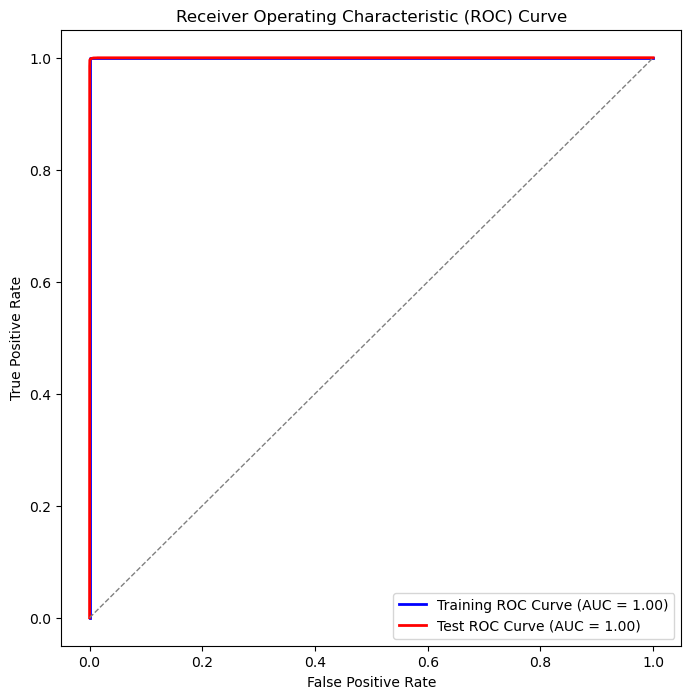

In [9]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The mean values of the classes are 0.9078311071970253 0.05396436393772568
The standard deviations of the classes are 0.09928965203299861 0.06079503450895584


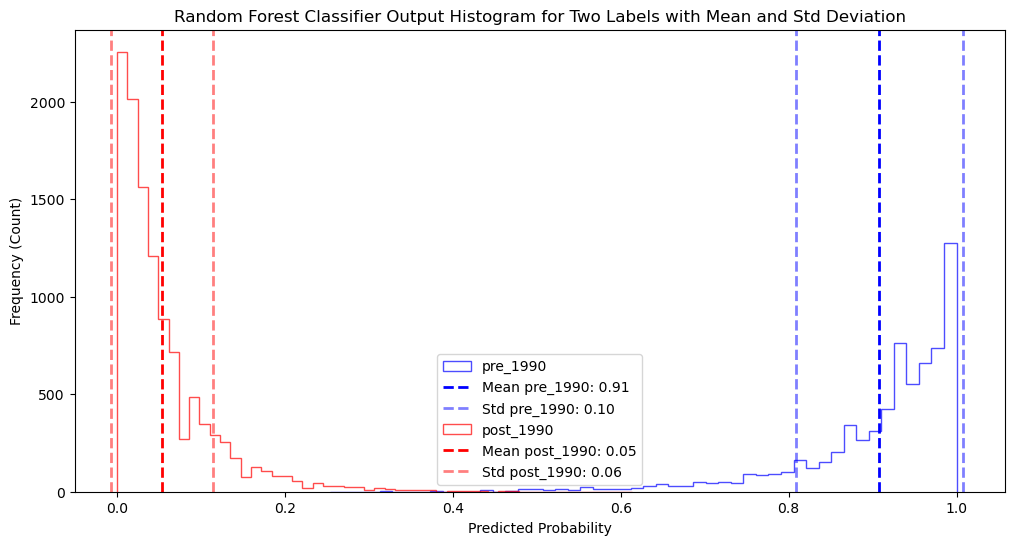

In [10]:
# Get the predicted probabilities for the positive class for the test set
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('Random Forest Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [11]:
e = 10**-10

z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2) + e)


print('The Z-score for the Random Forest classifier with feature engineering is', z)

The Z-score for the nominal KNN classifier with feature engineering is 7.334133437956841


## AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
X = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a weak classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=150, learning_rate=0.01, random_state=0)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

print('Accuracy on training set: {:3f}'.format(adaboost_classifier.score(X_train, y_train)))
print('Accuracy on test set: {:3f}'.format(adaboost_classifier.score(X_test, y_test)))

Accuracy on training set: 0.999972
Accuracy on test set: 0.989931


Rain: 0.0012
Hurs: 0.1815
Temperature: 0.0005
Tmax: 0.0004
Tmin: 0.0006
Sun: 0.0030
Frost: 0.0012
Wind: 0.0014
Psl: 0.0095
Winter Rain: 0.0028
Summer Rain: 0.0039
Spring Rain: 0.0258
Autumn Rain: 0.0019
Winter Hurs: 0.0575
Summer Hurs: 0.0321
Spring Hurs: 0.0418
Autumn Hurs: 0.0067
Winter Temp: 0.0101
Summer Temp: 0.0021
Spring Temp: 0.0104
Autumn Temp: 0.0028
Winter Tmax: 0.0135
Summer Tmax: 0.0053
Spring Tmax: 0.0018
Autumn Tmax: 0.0033
Winter Tmin: 0.0838
Summer Tmin: 0.0067
Spring Tmin: 0.0019
Autumn Tmin: 0.0050
Winter Sun: 0.0514
Summer Sun: 0.0480
Spring Sun: 0.0463
Autumn Sun: 0.0175
Winter Frost: 0.0209
Summer Frost: 0.0003
Spring Frost: 0.0062
Autumn Frost: 0.0154
Winter Psl: 0.0418
Summer Psl: 0.0966
Spring Psl: 0.0678
Autumn Psl: 0.0606
Winter Wind: 0.0020
Summer Wind: 0.0005
Spring Wind: 0.0038
Autumn Wind: 0.0023


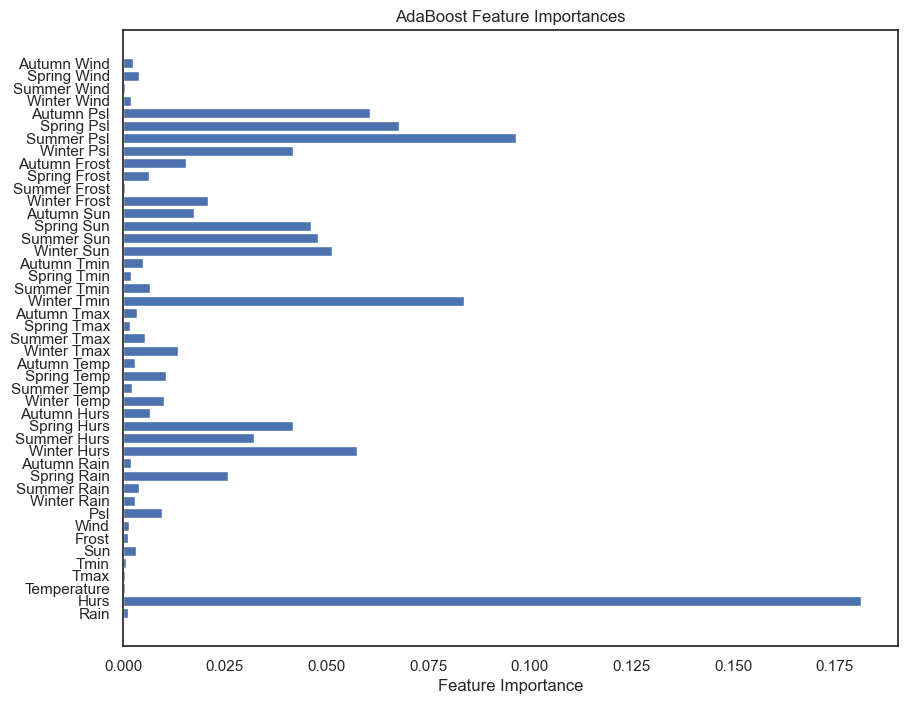

In [26]:
importances = adaboost_classifier.feature_importances_
feature_names = df[['Rain', 'Hurs', 'Temperature', 'Tmax', 'Tmin',
    'Sun', 'Frost', 'Wind', 'Psl',
    'Winter Rain', 'Summer Rain', 'Spring Rain', 'Autumn Rain',
    'Winter Hurs', 'Summer Hurs', 'Spring Hurs', 'Autumn Hurs',
    'Winter Temp', 'Summer Temp', 'Spring Temp', 'Autumn Temp',
    'Winter Tmax', 'Summer Tmax', 'Spring Tmax', 'Autumn Tmax',
    'Winter Tmin', 'Summer Tmin', 'Spring Tmin', 'Autumn Tmin',
    'Winter Sun', 'Summer Sun', 'Spring Sun', 'Autumn Sun',
    'Winter Frost', 'Summer Frost', 'Spring Frost', 'Autumn Frost',
    'Winter Psl', 'Summer Psl', 'Spring Psl', 'Autumn Psl',
    'Winter Wind', 'Summer Wind', 'Spring Wind', 'Autumn Wind']].columns


for feature, importance in zip(feature_names, importances):
    print('{}: {:.4f}'.format(feature, importance))
    
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('AdaBoost Feature Importances')
plt.show()

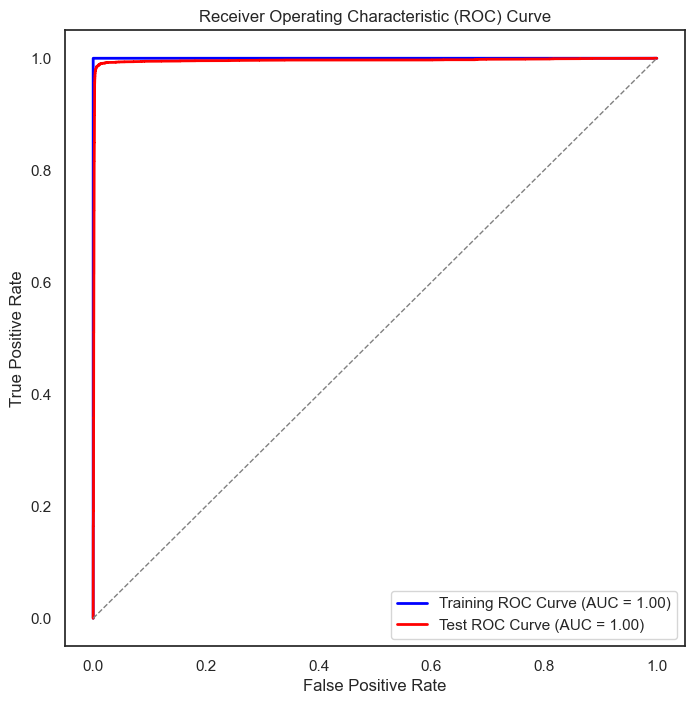

In [27]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

# Get the predicted probabilities for the positive class for both training and test sets
y_train_prob = adaboost_classifier.predict_proba(X_train)[:, 1]
y_test_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve for both training and test sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_test_prob)

# Calculate the area under the curve (AUC) for both training and test sets
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The mean values of the classes are 0.9671409159007517 0.01565628926217045
The standard deviations of the classes are 0.12004112969902174 0.06587420477291621


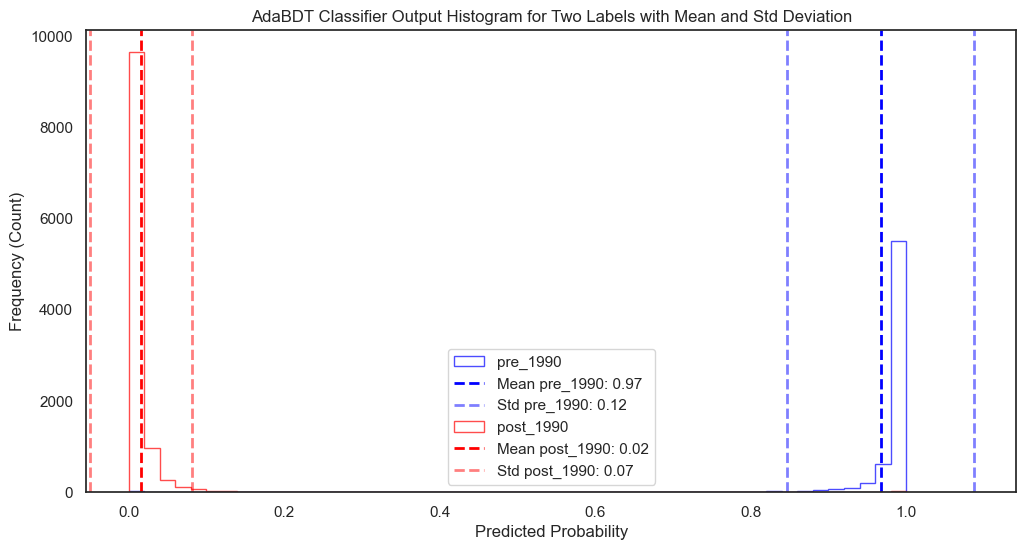

In [28]:
# Get the predicted probabilities for the positive class for the test set
y_test_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Create a DataFrame with true labels and predicted probabilities
result_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Probability': y_test_prob
})

label_1 = 'pre_1990'
label_2 = 'post_1990'

# Filter the DataFrame for each label
data_label_1 = result_df[result_df['True_Label'] == label_1]['Predicted_Probability']
data_label_2 = result_df[result_df['True_Label'] == label_2]['Predicted_Probability']

# Calculate mean and standard deviation values
mean_label_1 = np.mean(data_label_1)
std_label_1 = np.std(data_label_1)

mean_label_2 = np.mean(data_label_2)
std_label_2 = np.std(data_label_2)

print('The mean values of the classes are', mean_label_1, mean_label_2)
print('The standard deviations of the classes are', std_label_1, std_label_2)

# Create histograms for each label using matplotlib without density normalization
plt.figure(figsize=(12, 6))

# Histogram for label_1
plt.hist(data_label_1, bins=50, alpha=0.7, label=f'{label_1}', color='blue', histtype='step')
plt.axvline(mean_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean {label_1}: {mean_label_1:.2f}')
plt.axvline(mean_label_1 + std_label_1, color='blue', linestyle='dashed', linewidth=2, label=f'Std {label_1}: {std_label_1:.2f}', alpha=0.5)
plt.axvline(mean_label_1 - std_label_1, color='blue', linestyle='dashed', linewidth=2, alpha=0.5)

# Histogram for label_2
plt.hist(data_label_2, bins=50, alpha=0.7, label=f'{label_2}', color='red', histtype='step')
plt.axvline(mean_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean {label_2}: {mean_label_2:.2f}')
plt.axvline(mean_label_2 + std_label_2, color='red', linestyle='dashed', linewidth=2, label=f'Std {label_2}: {std_label_2:.2f}', alpha=0.5)
plt.axvline(mean_label_2 - std_label_2, color='red', linestyle='dashed', linewidth=2, alpha=0.5)

plt.title('AdaBDT Classifier Output Histogram for Two Labels with Mean and Std Deviation')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.show()

In [29]:
e = 10**(-10)

z = (mean_label_1 - mean_label_2) / np.sqrt((std_label_1 **2) + (std_label_2 **2) + e)

print('The Z-score for the AdaBoost classifier with feature engineering is', z)

The Z-score for the nominal KNN classifier with feature engineering is 0.5173719849013281
